In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, Y_train),(X_test, Y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
Y_train.shape

(50000, 1)

In [ ]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# Reshaping Y_train 2-d array into a 1_d array
Y_train = Y_train.reshape(-1,)

In [ ]:
classes = ['airplanes', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def plotSample(X, Y, index):
  plt. figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

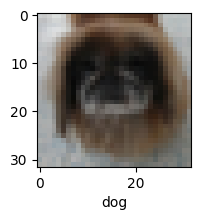

In [ ]:
plotSample(X_train, Y_train, 999)

In [ ]:
#  Normalizing the values to range between 0-1
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = keras.Sequential([
    # for neural netwrok we need to flatten the 2-d array into a 1-d array
    keras.layers.Flatten(input_shape=(32,32,3)),

    #hidden layers
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),

    # output layer with 10 neurons as our dataset has 10 classes
    keras.layers.Dense(10, activation = 'sigmoid')

])

# using 'categorical_crossentropy' loss function because our label data is one hot encoded
# if our label data was a descrete value, we would use 'sparse_categorical_crossentropy'
# using SGD as optimizer because dataset is of large size

ann.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5, batch_size=50  )

Epoch 1/5
1000/1000 [==============================] - 122s 121ms/step - loss: 1.8434 - accuracy: 0.3451
Epoch 2/5
1000/1000 [==============================] - 122s 122ms/step - loss: 1.6618 - accuracy: 0.4147
Epoch 3/5
1000/1000 [==============================] - 131s 131ms/step - loss: 1.5792 - accuracy: 0.4470
Epoch 4/5
1000/1000 [==============================] - 129s 129ms/step - loss: 1.5269 - accuracy: 0.4630
Epoch 5/5
1000/1000 [==============================] - 130s 130ms/step - loss: 1.4804 - accuracy: 0.4819


In [ ]:
ann.evaluate(X_test, Y_test)

313/313 [==============================] - 16s 50ms/step - loss: 1.4800 - accuracy: 0.4760


[1.479956030845642, 0.47600001096725464]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 [==============================] - 10s 32ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.59      0.53      1000
           1       0.64      0.51      0.57      1000
           2       0.32      0.46      0.38      1000
           3       0.43      0.20      0.27      1000
           4       0.40      0.40      0.40      1000
           5       0.42      0.33      0.37      1000
           6       0.51      0.52      0.51      1000
           7       0.58      0.49      0.53      1000
           8       0.55      0.67      0.60      1000
           9       0.48      0.59      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



# **Comparing performence using CNN**

In [ ]:
cnn = keras.Sequential([

    # ****************** Convolution Layers ******************
    # filters argument the number of filters which are feature extractors, kernel_size specifies the size of the filter.
    layers.Conv2D(filters =32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3) ),
    # MaxPooling (2,2) filter with some strid3
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters =64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3) ),
    layers.MaxPooling2D(2,2),



    # ****************** Dense Layers ******************
    # for neural netwrok we need to flatten the 2-d array into a 1-d array
    keras.layers.Flatten(),

    #hidden layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),

    # output layer with 10 neurons as our dataset has 10 classes
    keras.layers.Dense(10, activation = 'softmax')

])



In [ ]:
cnn.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=5, batch_size=50  )

Epoch 1/5
1000/1000 [==============================] - 80s 79ms/step - loss: 1.4532 - accuracy: 0.4741
Epoch 2/5
1000/1000 [==============================] - 79s 79ms/step - loss: 1.0658 - accuracy: 0.6252
Epoch 3/5
1000/1000 [==============================] - 82s 82ms/step - loss: 0.9274 - accuracy: 0.6767
Epoch 4/5
1000/1000 [==============================] - 79s 79ms/step - loss: 0.8263 - accuracy: 0.7114
Epoch 5/5
1000/1000 [==============================] - 78s 78ms/step - loss: 0.7445 - accuracy: 0.7397


In [ ]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 8s 23ms/step - loss: 0.8833 - accuracy: 0.6966


[0.8833402395248413, 0.6966000199317932]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 [==============================] - 7s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       0.78      0.83      0.80      1000
           2       0.57      0.59      0.58      1000
           3       0.55      0.46      0.50      1000
           4       0.62      0.70      0.66      1000
           5       0.65      0.55      0.59      1000
           6       0.66      0.86      0.74      1000
           7       0.81      0.71      0.76      1000
           8       0.82      0.79      0.80      1000
           9       0.82      0.71      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

